## Data :
--> Date (date the crash had taken place)

--> Time (time the crash had taken place)

--> Location

--> Operator

--> Flight 

--> Route

--> Type

--> Registration

--> cn/In - ?

--> Aboard - number of people aboard

--> Fatalities - lethal outcome

--> Ground - saved people

--> Summary - brief summary of the case


## Importing Libraries & getting Data

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# plt.style.use('dark_background')

from datetime import date ,timedelta ,datetime
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('datasets/Airplane_Crashes_and_Fatalities_Since_1908.csv/Airplane_Crashes_and_Fatalities_Since_1908.csv')

In [3]:
data.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5268 non-null   object 
 1   Time          3049 non-null   object 
 2   Location      5248 non-null   object 
 3   Operator      5250 non-null   object 
 4   Flight #      1069 non-null   object 
 5   Route         3562 non-null   object 
 6   Type          5241 non-null   object 
 7   Registration  4933 non-null   object 
 8   cn/In         4040 non-null   object 
 9   Aboard        5246 non-null   float64
 10  Fatalities    5256 non-null   float64
 11  Ground        5246 non-null   float64
 12  Summary       4878 non-null   object 
dtypes: float64(3), object(10)
memory usage: 535.2+ KB


## Handling Missing Values

In [5]:
def percent_missing_data(data):
    missing_count = data.isnull().sum().sort_values(ascending=False)
    missing_percent = 100 * data.isnull().sum().sort_values(ascending=False) / len(data)

    missing_count = pd.DataFrame(missing_count[missing_count > 0])
    missing_percent = pd.DataFrame(missing_percent[missing_percent > 0])

    missing_values_table = pd.concat([missing_count, missing_percent], axis=1)

    missing_values_table.columns = ["missing_count", "missing_percent"]

    print('The dataset consists of {0} columns , out of which {1} have missing values.'.format(
        data.shape[1], str(missing_values_table.shape[0])))

    return missing_values_table

In [6]:
percent_missing_data(data)

The dataset consists of 13 columns , out of which 12 have missing values.


,missing_count,missing_percent
Flight #,4199,79.707669
Time,2219,42.122248
Route,1706,32.384207
cn/In,1228,23.310554
Summary,390,7.403189
Registration,335,6.359150
Type,27,0.512528
Aboard,22,0.417616
Ground,22,0.417616
Location,20,0.379651


<AxesSubplot:>

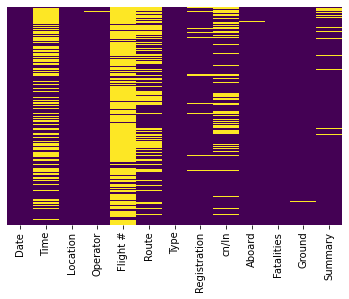

In [7]:
sns.heatmap(data.isnull() ,yticklabels=False ,cbar=False ,cmap='viridis')

## Analysing Date & Time

In [8]:
data.Time.head() ,data.Date.head()

(0    17:18
 1    06:30
 2      NaN
 3    18:30
 4    10:30
 Name: Time, dtype: object,
 0    09/17/1908
 1    07/12/1912
 2    08/06/1913
 3    09/09/1913
 4    10/17/1913
 Name: Date, dtype: object)

In [9]:
# replacing missing data in 'Time' column with 0.00 

data['Time'] = data['Time'].replace(np.nan ,'00:00')
# changing format 

data['Time'] = data['Time'].str.replace('c: ', '')
data['Time'] = data['Time'].str.replace('c:', '')
data['Time'] = data['Time'].str.replace('c', '')
data['Time'] = data['Time'].str.replace('12\'20', '12:20')
data['Time'] = data['Time'].str.replace('18.40', '18:40')
data['Time'] = data['Time'].str.replace('0943', '09:43')
data['Time'] = data['Time'].str.replace('22\'08', '22:08')
data['Time'] = data['Time'].str.replace('114:20', '00:00')

In [10]:
data['Time'] = data['Date'] + ' ' + data['Time']

def to_date(x):
    return datetime.strptime(x, '%m/%d/%Y %H:%M')

data['Time'] = data['Time'].apply(to_date)

print('Date ranges from ' + str(data.Time.min()) + ' to ' + str(data.Time.max()))

data.Operator = data.Operator.str.upper()


Date ranges from 1908-09-17 17:18:00 to 2009-06-08 00:00:00


In [11]:
data.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,1908-09-17 17:18:00,"Fort Myer, Virginia",MILITARY - U.S. ARMY,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,1912-07-12 06:30:00,"AtlantiCity, New Jersey",MILITARY - U.S. NAVY,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,1913-08-06 00:00:00,"Victoria, British Columbia, Canada",PRIVATE,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,1913-09-09 18:30:00,Over the North Sea,MILITARY - GERMAN NAVY,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,1913-10-17 10:30:00,"Near Johannisthal, Germany",MILITARY - GERMAN NAVY,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


# Visualization

## Analysing Total Accidents per Year

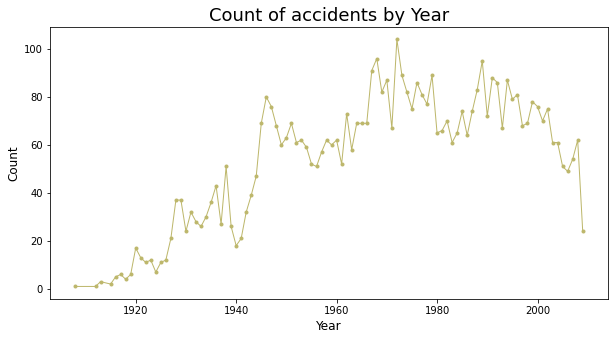

In [12]:
temp = data.groupby(data.Time.dt.year)[['Date']].count()
temp = temp.rename(columns={'Date':'Count'})

plt.figure(figsize=(10,5))
plt.plot(temp.index ,'Count', data=temp, color='darkkhaki' ,marker='.',linewidth=1)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Count of accidents by Year', loc='Center', fontsize=18)
plt.show()

## Analysing Total Accidents per Month, weekday & hour-of-day

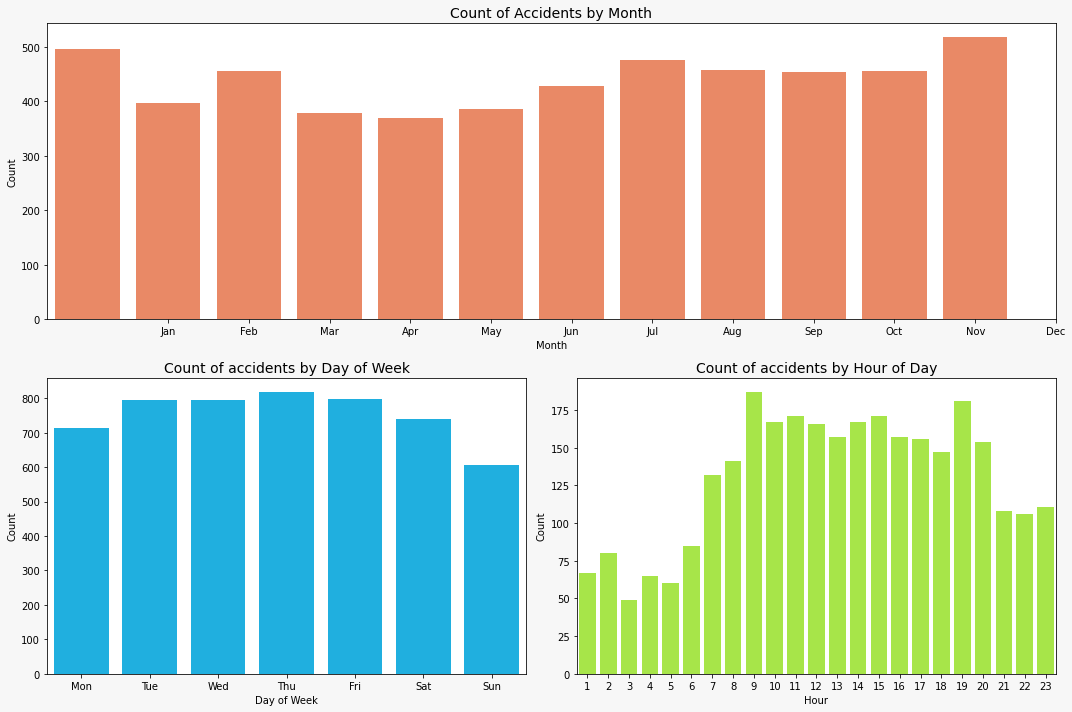

In [13]:
import matplotlib.pylab as pl 
import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(2,2)
plt.figure(figsize=(15,10) ,facecolor='#f7f7f7')

# 1st plot (month)
ax0 = pl.subplot(gs[0,:])
sns.barplot(data.groupby(data.Time.dt.month)[['Date']].count().index, 'Date', data=data.groupby(data.Time.dt.month)[['Date']].count(),color='coral',linewidth=2)

plt.xticks(data.groupby(data.Time.dt.month)[['Date']].count().index, [
           'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.xlabel('Month' ,fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of Accidents by Month',loc='center', fontsize=14)

#====================================================================#

# 2nd plot (weekday)
ax1 = pl.subplot(gs[1,0])
sns.barplot(data.groupby(data.Time.dt.weekday)[['Date']].count().index, 'Date', data=data.groupby(data.Time.dt.weekday)[['Date']].count() ,color='deepskyblue' ,linewidth=1)

plt.xticks(data.groupby(data.Time.dt.weekday)[['Date']].count().index, [
           'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

plt.xlabel('Day of Week', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Day of Week', loc='Center', fontsize=14)

#====================================================================#

# 3rd plot (hour)

ax2 = pl.subplot(gs[1,1])
sns.barplot(data[data.Time.dt.hour != 0].groupby(data.Time.dt.hour)[['Date']].count().index, 'Date',
            data=data[data.Time.dt.hour != 0].groupby(data.Time.dt.hour)[['Date']].count(), color='greenyellow', linewidth=1)

# plt.xticks(data.groupby(data.Time.dt.hour)[['Date']].count().index, [
#            'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

plt.xlabel('Hour', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Hour of Day', loc='Center', fontsize=14)

plt.tight_layout()
plt.show()


## Analysing Total Accidents based on Operator (Military)

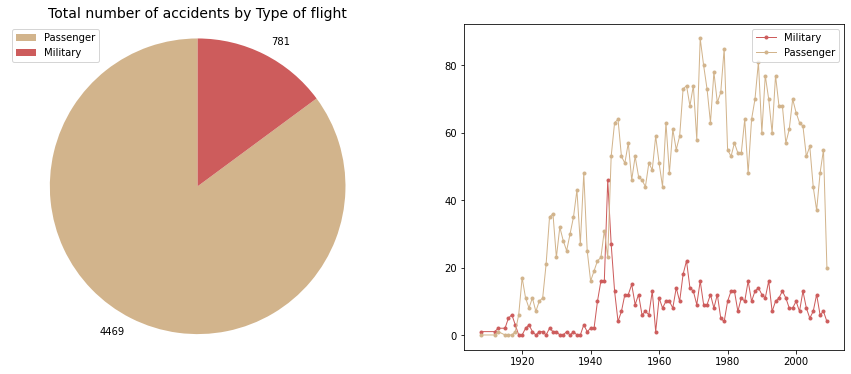

In [14]:
temp = data.copy()
temp['isMilitary'] = temp.Operator.str.contains('MILITARY')
temp = temp.groupby('isMilitary')[['isMilitary']].count()
temp.index = ['Passenger' ,'Military'] 

temp_ = data.copy()
temp_['Military'] = temp_.Operator.str.contains('MILITARY')
temp_['Passenger'] = temp_.Military == False
temp_ = temp_.loc[:, ['Time', 'Military', 'Passenger']]
temp_ = temp_.groupby(temp_.Time.dt.year)[
    ['Military', 'Passenger']].aggregate(np.count_nonzero)


colors = ['tan', 'indianred']
plt.figure(figsize=(15, 6))

# 1st plot(pie-plot)
plt.subplot(1, 2, 1)
patches, texts = plt.pie(temp.isMilitary, colors=colors,
                         labels=temp.isMilitary, startangle=90)
plt.legend(patches, temp.index, loc="best", fontsize=10)
plt.axis('equal')
plt.title('Total number of accidents by Type of flight',
          loc='Center', fontsize=14)

# 2nd plot
plt.subplot(1, 2, 2)
plt.plot(temp_.index, 'Military', data=temp_,
         color='indianred', marker=".", linewidth=1)
plt.plot(temp_.index, 'Passenger', data=temp_,
         color='tan', marker=".", linewidth=1)
plt.legend(fontsize=10)

plt.show()


## Analysing Fatalities vs Year

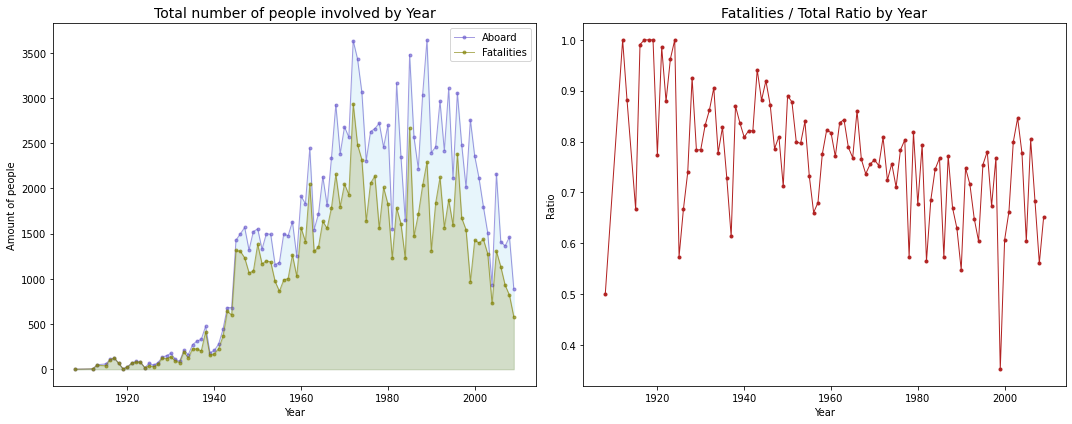

In [15]:
Fatalities = data.groupby(data.Time.dt.year).sum()
Fatalities['Proportion'] = Fatalities['Fatalities'] / Fatalities['Aboard']

plt.figure(figsize=(15, 6))
# 1st plot 
plt.subplot(1, 2, 1)

plt.fill_between(Fatalities.index, 'Aboard',data=Fatalities, color="skyblue", alpha=0.2)
plt.plot(Fatalities.index, 'Aboard', data=Fatalities,marker=".", color="Slateblue", alpha=0.6, linewidth=1)

plt.fill_between(Fatalities.index, 'Fatalities',data=Fatalities, color="olive", alpha=0.2)
plt.plot(Fatalities.index, 'Fatalities', data=Fatalities,color="olive", marker=".", alpha=0.6, linewidth=1)

plt.legend(fontsize=10,loc='best')
plt.xlabel('Year', fontsize=10)
plt.ylabel('Amount of people', fontsize=10)
plt.title('Total number of people involved by Year', loc='Center', fontsize=14)

# 2nd plot
plt.subplot(1, 2, 2)
plt.plot(Fatalities.index, 'Proportion', data=Fatalities,marker=".", color='firebrick', linewidth=1)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Ratio', fontsize=10)
plt.title('Fatalities / Total Ratio by Year', loc='Center', fontsize=14)
plt.tight_layout()
plt.show()


### So, 1970-1990 look like scary years in the history of air-flights with rise of deaths, but there might be also the rise of total amount of people flying by air, while actually proportion became lower.

### So, now analysing another dataset showing total number of flights or passengers

# Getting Data from new dataset

In [16]:
data_ = pd.read_csv('datasets/API_IS.AIR.DPRT_DS2_en_csv_v2_2766566/API_IS.AIR.DPRT_DS2_en_csv_v2_2766566.csv')


In [17]:
data_.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,"Air transport, registered carrier departures w...",IS.AIR.DPRT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2132.0,2276.000000,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Air transport, registered carrier departures w...",IS.AIR.DPRT,NaN,NaN,NaN,NaN,NaN,NaN,...,514462.289437,548834.772,534810.303494,556341.0,562927.0,630147.0,705127.484622,712679.300,NaN,NaN
2,Afghanistan,AFG,"Air transport, registered carrier departures w...",IS.AIR.DPRT,NaN,NaN,NaN,NaN,NaN,NaN,...,17775.000000,21696.000,25920.000000,23532.0,22770.0,24207.0,10454.000000,7334.000,NaN,NaN
3,Africa Western and Central,AFW,"Air transport, registered carrier departures w...",IS.AIR.DPRT,NaN,NaN,NaN,NaN,NaN,NaN,...,146632.960288,155038.000,145526.823309,164614.0,157788.0,151203.0,157126.726524,154318.789,NaN,NaN
4,Angola,AGO,"Air transport, registered carrier departures w...",IS.AIR.DPRT,NaN,NaN,NaN,NaN,NaN,NaN,...,13072.000000,14496.000,13716.000000,13116.0,15482.0,13494.0,13978.000000,13647.000,NaN,NaN


In [18]:
data_.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', 'Unnamed: 65'],
      dtype='object')

## Data Cleaning

In [19]:
data_ = data_.drop('Unnamed: 65',axis=1)
data_ = data_.drop(['Country Name', 'Country Code',
                   'Indicator Name', 'Indicator Code'], axis=1)


In [20]:
data_.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2132.0,2276.000000,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,500629.946597,514462.289437,548834.772,534810.303494,556341.0,562927.0,630147.0,705127.484622,712679.300,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25021.000000,17775.000000,21696.000,25920.000000,23532.0,22770.0,24207.0,10454.000000,7334.000,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,138169.497897,146632.960288,155038.000,145526.823309,164614.0,157788.0,151203.0,157126.726524,154318.789,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12282.000000,13072.000000,14496.000,13716.000000,13116.0,15482.0,13494.0,13978.000000,13647.000,NaN


In [21]:
data_ = data_.replace(np.nan, 0)
data_ = pd.DataFrame(data_.sum())
data_.drop(data_.index[0:10])
data_ = data_['1970' :'2008']
data_.columns = ['Sum']
data_.index.name = 'Year'


In [22]:
data_.head()

,Sum
Year,
1970,57146000.0
1971,57443100.0
1972,48218500.0
1973,59066500.0
1974,64891900.0


In [23]:
Fatalities = Fatalities.reset_index()
Fatalities.Time = Fatalities.Time.apply(str)
Fatalities.index = Fatalities['Time']
del Fatalities['Time']
Fatalities = Fatalities['1970':'2008']
Fatalities = Fatalities[['Fatalities']]

Fatalities.head()

,Fatalities
Time,
1970,2049.0
1971,1932.0
1972,2937.0
1973,2485.0
1974,2318.0


In [24]:
data_ = pd.concat([data_, Fatalities], axis=1)
data_['Ratio'] = data_['Fatalities'] / data_['Sum'] * 100
data_.Ratio.head()

1970    0.003586
1971    0.003363
1972    0.006091
1973    0.004207
1974    0.003572
Name: Ratio, dtype: float64

# Visualization (data_)

## Analysing Amount of Passengers ,Total number of Fatalities per Year & Fatalities Ratio 

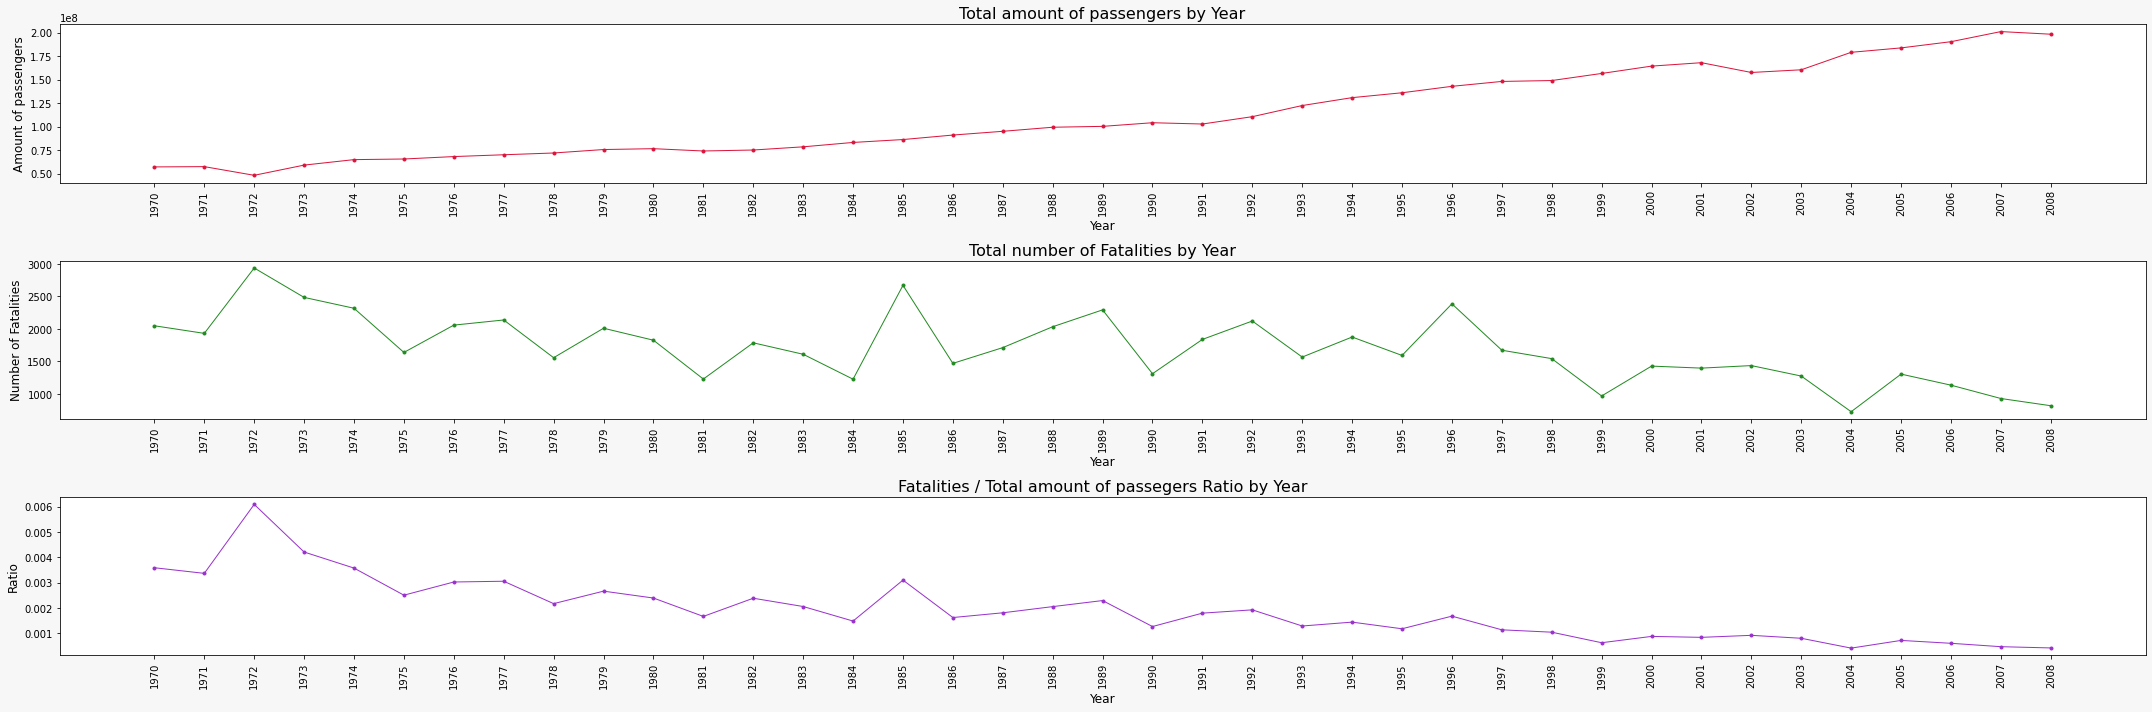

In [33]:
gs = gridspec.GridSpec(3,3)
plt.figure(figsize=(30,10) ,facecolor='#f7f7f7')

ax0 = pl.subplot(gs[0,:])
plt.plot(data_.index ,'Sum' ,data=data_ ,marker='.' ,color='crimson',linewidth=1)

plt.xlabel('Year' ,fontsize=12)
plt.ylabel('Amount of passengers', loc='center', fontsize=12)
plt.title('Total amount of passengers by Year', loc='center', fontsize=16)
plt.xticks(rotation=90)

#---------------------------------------------------#

ax1 = pl.subplot(gs[1,:])
plt.plot(Fatalities.index, 'Fatalities', data=Fatalities,
         marker='.', color='forestgreen', linewidth=1)

plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Fatalities', loc='center', fontsize=12)
plt.title('Total number of Fatalities by Year', loc='center', fontsize=16)
plt.xticks(rotation=90)

#---------------------------------------------------#

ax2 = pl.subplot(gs[2,:])
plt.plot(data_.index, 'Ratio', data=data_,
         marker='.', color='darkorchid', linewidth=1)

plt.xlabel('Year', fontsize=12)
plt.ylabel('Ratio', loc='center', fontsize=12)
plt.title('Fatalities / Total amount of passegers Ratio by Year',
          loc='center', fontsize=16)
plt.xticks(rotation=90)

#---------------------------------------------------#

plt.tight_layout()
plt.show()


## Analysing Ratio VS number of deaths

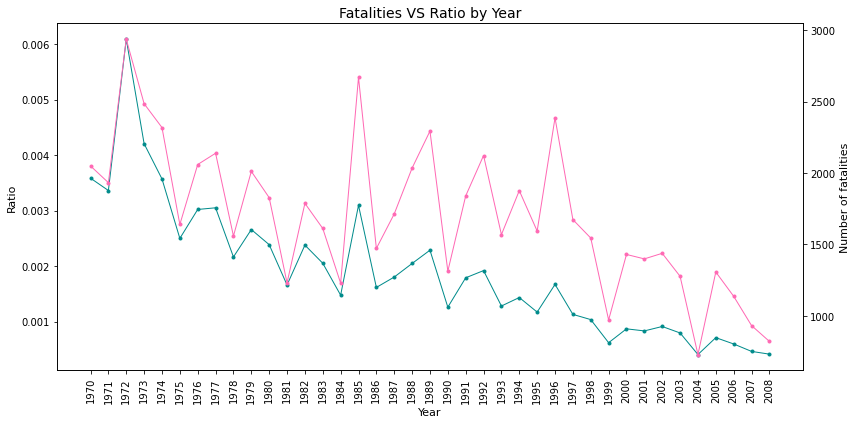

In [36]:
fig = plt.figure(figsize=(12, 6))
ax1 = fig.subplots()
ax1.plot(data_.index, 'Ratio', data=data_,
         color='darkcyan', marker=".", linewidth=1)
ax1.set_xlabel('Year', fontsize=11)

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

ax1.set_ylabel('Ratio', fontsize=11)
ax1.tick_params('y')

ax2 = ax1.twinx()
ax2.plot(Fatalities.index, 'Fatalities', data=Fatalities,
         color='hotpink', marker=".", linewidth=1)

ax2.set_ylabel('Number of fatalities', fontsize=11)
ax2.tick_params('y')

plt.title('Fatalities VS Ratio by Year', loc='Center', fontsize=14)
fig.tight_layout()
plt.show()


## Analysing Operator vs Fatality-Count

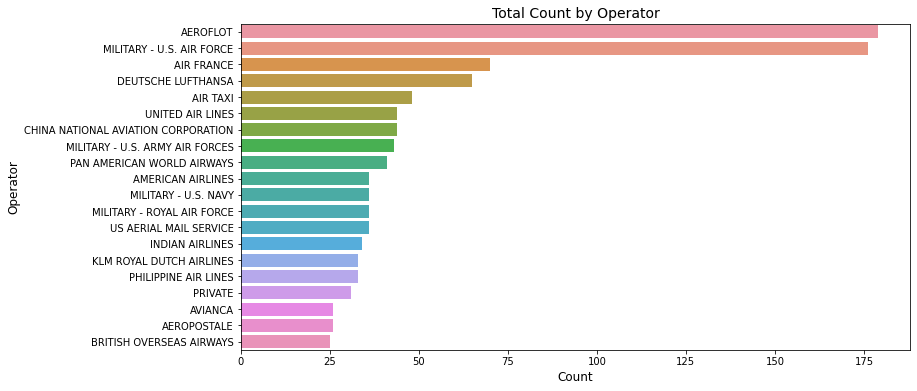

In [38]:
data.Operator = data.Operator.str.upper()
data.Operator = data.Operator.replace('A B AEROTRANSPORT' ,'AB AEROTRANSPORT')

total_count_operator = data.groupby('Operator')[['Operator']].count()
total_count_operator = total_count_operator.rename(columns={'Operator':'Count'})
total_count_operator = total_count_operator.sort_values(by='Count' ,ascending=False).head(20)

plt.figure(figsize=(12,6))
sns.barplot(x='Count' ,y=total_count_operator.index ,data=total_count_operator )
plt.xlabel('Count',fontsize=12)
plt.ylabel('Operator' ,fontsize=12)
plt.title('Total Count by Operator' ,loc='center', fontsize=14)
plt.show()

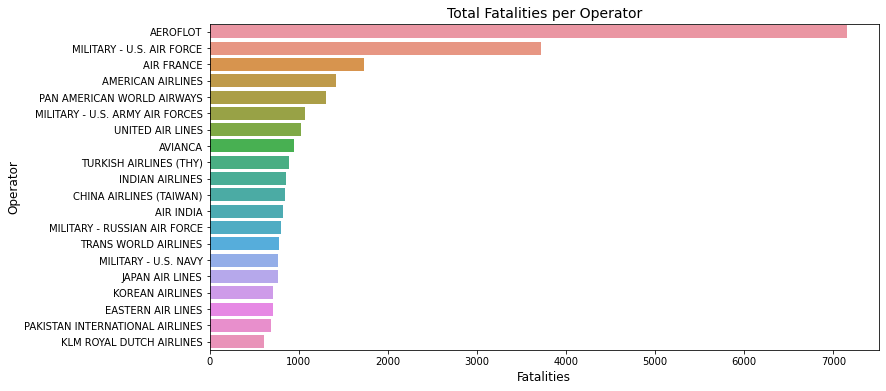

In [39]:
total_fatality_per_operator = data.groupby('Operator')[['Fatalities']].sum()
total_fatality_per_operator = total_fatality_per_operator.rename(columns={'Operator':'Fatalities'})
total_fatality_per_operator = total_fatality_per_operator.sort_values(by='Fatalities' ,ascending=False).head(20)

plt.figure(figsize=(12,6))
sns.barplot(x='Fatalities' ,y=total_fatality_per_operator.index ,data=total_fatality_per_operator )
plt.xlabel('Fatalities',fontsize=12)
plt.ylabel('Operator' ,fontsize=12)
plt.title('Total Fatalities per Operator' ,loc='center', fontsize=14)
plt.show()

## Analysing AEROFLOT (as they had the highest number of fatalities in all of the operators)

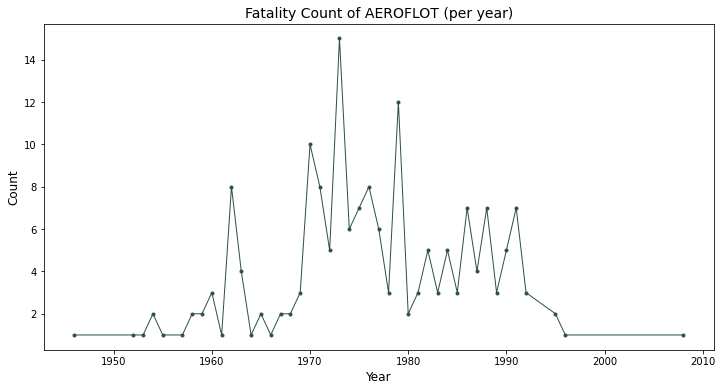

In [47]:
aeroflot = data[data.Operator =='AEROFLOT']

count_per_year = aeroflot.groupby(data.Time.dt.year)[['Date']].count()
count_per_year = count_per_year.rename(columns={'Date' : 'Count'})

plt.figure(figsize=(12,6))
plt.plot(count_per_year.index ,'Count' ,data=count_per_year ,marker='.' ,linewidth=1 ,color='darkslategray')

plt.xlabel('Year',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Fatality Count of AEROFLOT (per year)',loc='Center',fontsize=14)
plt.show()

## Observations : 
### --> Even so the number of crashes and fatalities is increasing, the number of flights is also increasing. 
### --> And we could actually see that the ratio of fatalities/total amount of passengers trending down (for 2000s). 
### --> However we can not make decisions about any Operator like "which airline is much safer to flight with" without knowledge of total amount flights. 
### --> If Aeroflot has the largest number of crashes this doesn't mean that it is not worse to flight with because it might have the largest amount of flights.